NaN in Sleep Quality: 0
Inf in Sleep Quality: 0
Data for Female: Mean = 8.25, Count = 4
Data for Male: Mean = 5.00, Count = 4
Data for Other: Mean = 8.00, Count = 2
------ Sleep Quality Analysis by Gender ------
Basic Statistics:
count    10.000000
mean      6.900000
std       1.911951
min       4.000000
25%       5.250000
50%       7.000000
75%       8.000000
max      10.000000
Name: Sleep Quality, dtype: float64

Statistics by Gender:
        mean  median  count   std
Gender                           
Female  8.25     8.0      4  1.26
Male    5.00     5.0      4  0.82
Other   8.00     8.0      2  1.41

Missing Data:
Gender           0
Sleep Quality    0
dtype: int64

Outliers (IQR): 0

High Sleep Quality Proportion:
   Gender  Proportion (%)
0  Female            75.0
1    Male             NaN
2   Other            50.0

Skewness by Gender:
Gender
Female    1.13
Male      0.00
Other      NaN
Name: Sleep Quality, dtype: float64

Kurtosis by Gender:
Gender
Female    2.23
Male      1.50
O

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


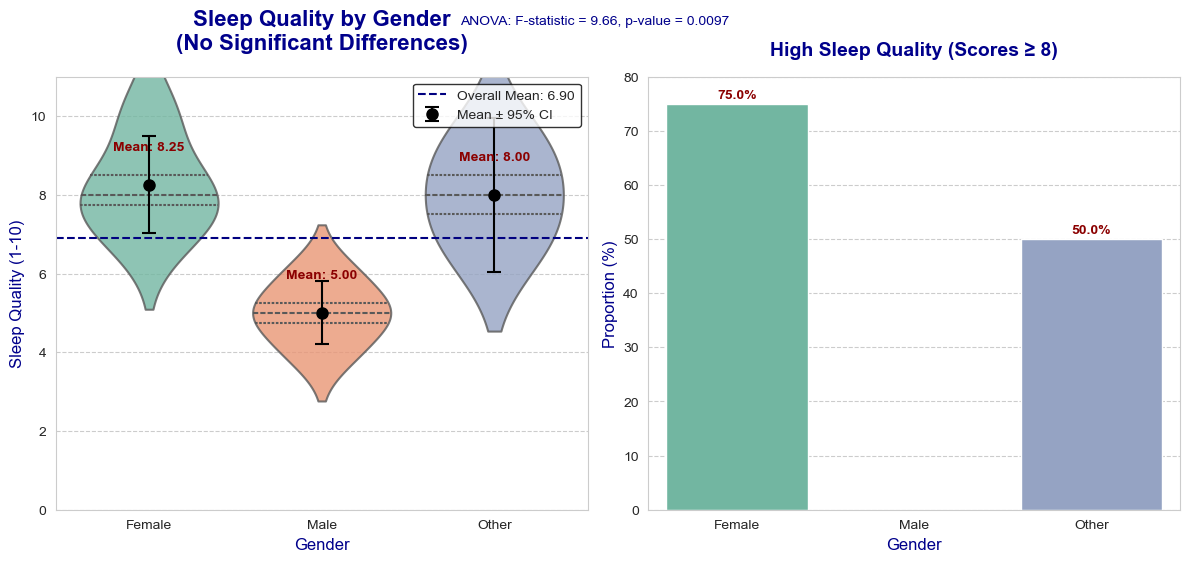

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

# Sample data
data = {
    'Gender': ['Female', 'Male', 'Female', 'Male', 'Other', 'Female', 'Male', 'Other', 'Female', 'Male'],
    'Sleep Quality': [8, 5, 7, 6, 9, 8, 4, 7, 10, 5]
}
df = pd.DataFrame(data)

# Data cleaning
df['Sleep Quality'] = df['Sleep Quality'].replace([np.inf, -np.inf], np.nan)
df['Sleep Quality'] = df['Sleep Quality'].fillna(df['Sleep Quality'].mean())

# Check data
print("NaN in Sleep Quality:", df['Sleep Quality'].isna().sum())
print("Inf in Sleep Quality:", np.isinf(df['Sleep Quality']).sum())

for gender in df['Gender'].unique():
    group = df[df['Gender'] == gender]['Sleep Quality']
    if len(group) == 0:
        print(f"Warning: No data for {gender}.")
    else:
        print(f"Data for {gender}: Mean = {group.mean():.2f}, Count = {len(group)}")

# Data analysis
print("------ Sleep Quality Analysis by Gender ------")

# Basic statistics
print("Basic Statistics:")
print(df['Sleep Quality'].describe())

# Statistics by gender
gender_statistics = df.groupby('Gender')['Sleep Quality'].agg(['mean', 'median', 'count', 'std']).round(2)
print("")
print("Statistics by Gender:")
print(gender_statistics)

# Missing data check
missing = df[['Gender', 'Sleep Quality']].isnull().sum()
print("")
print("Missing Data:")
print(missing)

# Outlier detection
Q1 = df['Sleep Quality'].quantile(0.25)
Q3 = df['Sleep Quality'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers = df[(df['Sleep Quality'] < lower) | (df['Sleep Quality'] > upper)]
print("")
print(f"Outliers (IQR): {len(outliers)}")
if len(outliers) > 0:
    print("Outlier Sample:")
    print(outliers[['Gender', 'Sleep Quality']].head())

# High sleep quality proportion
high_quality = df[df['Sleep Quality'] >= 8].groupby('Gender').size() / df.groupby('Gender').size() * 100
high_quality = high_quality.reset_index(name='Proportion (%)')
print("")
print("High Sleep Quality Proportion:")
print(high_quality.round(2))

# Skewness and kurtosis
skewness = df.groupby('Gender')['Sleep Quality'].skew().round(2)
kurtosis = df.groupby('Gender')['Sleep Quality'].apply(lambda x: x.kurt()).round(2)
print("")
print("Skewness by Gender:")
print(skewness)
print("")
print("Kurtosis by Gender:")
print(kurtosis)

# ANOVA test
f_stat, p_val = f_oneway(
    df[df['Gender'] == 'Female']['Sleep Quality'],
    df[df['Gender'] == 'Male']['Sleep Quality'],
    df[df['Gender'] == 'Other']['Sleep Quality']
)
print("")
print(f"ANOVA: F-statistic = {f_stat:.2f}, p-value = {p_val:.4f}")

# Visualization
gender_means = df.groupby('Gender')['Sleep Quality'].mean().reset_index()
overall_mean = df['Sleep Quality'].mean()

def calculate_ci(data, confidence=0.95):
    if len(data) == 0 or np.isnan(data).any() or np.isinf(data).any():
        raise ValueError("Invalid data.")
    n = len(data)
    mean = np.mean(data)
    sem = np.std(data, ddof=1) / np.sqrt(n)
    h = sem * 1.96
    return mean - h, mean + h

ci = []
for gender in gender_means['Gender']:
    group = df[df['Gender'] == gender]['Sleep Quality']
    if len(group) == 0 or np.isnan(group).any() or np.isinf(group).any():
        print(f"Warning: Invalid data for {gender}.")
        ci.append([np.nan, np.nan])
    else:
        ci_lower, ci_upper = calculate_ci(group)
        ci.append([ci_lower, ci_upper])
ci = np.array(ci)

fig = plt.figure(figsize=(12, 6), facecolor='white')

# Main plot: Violin plot
ax1 = fig.add_subplot(1, 2, 1)
sns.set_style("whitegrid", {"grid.linestyle": "--", "grid.alpha": 0.2})
sns.violinplot(x='Gender', y='Sleep Quality', hue='Gender', data=df, 
               palette=['#66c2a5', '#fc8d62', '#8da0cb'], inner='quartile', 
               linewidth=1.5, alpha=0.8, legend=False)
ax1.axhline(overall_mean, color='navy', linestyle='--', linewidth=1.5, label=f'Overall Mean: {overall_mean:.2f}')

for i, gender in enumerate(gender_means['Gender']):
    mean = gender_means.loc[i, 'Sleep Quality']
    ci_lower, ci_upper = ci[i]
    
    if not np.isfinite(mean) or not np.isfinite(ci_lower) or not np.isfinite(ci_upper):
        print(f"Warning: Invalid values for {gender}.")
        continue
    
    ax1.errorbar(i, mean, yerr=[[mean - ci_lower], [ci_upper - mean]], fmt='o', color='black', 
                 capsize=5, capthick=1.5, markersize=8, label='Mean ± 95% CI' if i == 0 else "")
    ax1.text(i, mean + 0.8, f'Mean: {mean:.2f}', ha='center', va='bottom', fontsize=10, 
             color='darkred', fontweight='bold')

ax1.set_title('Sleep Quality by Gender\n(No Significant Differences)', 
              fontsize=16, fontweight='bold', pad=20, color='darkblue')
ax1.set_xlabel('Gender', fontsize=12, color='darkblue')
ax1.set_ylabel('Sleep Quality (1-10)', fontsize=12, color='darkblue')
ax1.set_ylim(0, 11)
fig.suptitle(f'ANOVA: F-statistic = {f_stat:.2f}, p-value = {p_val:.4f}', fontsize=10, y=0.92, 
             color='darkblue')
ax1.legend(loc='upper right', fontsize=10, frameon=True, edgecolor='black')

# Subplot: High sleep quality proportion
ax2 = fig.add_subplot(1, 2, 2)
sns.barplot(x='Gender', y='Proportion (%)', hue='Gender', data=high_quality, 
            palette=['#66c2a5', '#fc8d62', '#8da0cb'], ax=ax2, legend=False)
for i, proportion in enumerate(high_quality['Proportion (%)']):
    ax2.text(i, proportion + 0.5, f'{proportion:.1f}%', ha='center', va='bottom', fontsize=10, 
             color='darkred', fontweight='bold')

ax2.set_title('High Sleep Quality (Scores ≥ 8)', fontsize=14, fontweight='bold', pad=15, 
              color='darkblue')
ax2.set_xlabel('Gender', fontsize=12, color='darkblue')
ax2.set_ylabel('Proportion (%)', fontsize=12, color='darkblue')
ax2.set_ylim(0, max(high_quality['Proportion (%)']) + 5)

plt.tight_layout()
plt.savefig(r'C:\Users\10759\Desktop\sleep_quality_by_gender.png', dpi=300, bbox_inches='tight')
plt.show()